### Measuring chance
- We can measure the chances of an event using probability. We can calculate the probability of some event by taking the number of ways the event can happen and dividing it by the total number of possible outcomes. For example, if we flip a coin, it can land on either heads or tails. To get the probability of the coin landing on heads, we divide the 1 way to get heads by the two possible outcomes, heads and tails. This gives us one half, or a fifty percent chance of getting heads. Probability is always between zero and 100 percent. If the probability of something is zero, it's impossible, and if the probability of something is 100%, it will certainly happen.

### Some code about evaluating probabilities

- You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

amir_deals = pd.read_csv('data/amir_deals.csv')
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


- Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs

In [19]:
# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


#### Sampling deals

- In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.


- Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

In [20]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [21]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


### Discrete distributions and probability distributions.

- Rolling the dice, there are six numbers, or six possible outcomes, and every number has one sixth,
  or about a 17 percent chance of being rolled. This is an example of a probability distribution.


- Choosing salespeople is similar to rolling a dice, except we had names instead of numbers. Just 
  like rolling a die, each outcome, or name, had an equal chance of being chosen.


- A probability distribution describes the probability of each possible outcome in a scenario. 
   We can also talk about the expected value of a distribution, which is the mean of a distribution.
   We can calculate this by multiplying each value by its probability (one sixth in this case) 
   and summing, so the expected value of rolling a fair die is 3-point-5.


- We can visualize a probability distribution by using a barplot, where each bar represents an
  outcome, and each bar's height represents the probability of that outcome.


- We can calculate probabilities of different outcomes by taking areas of the probability 
   distribution. For example, what's the probability that our die roll is less than or equal to 2? 
   To figure this out, we'll take the area of each bar representing an outcome of 2 or less.
   Each bar has a width of 1 and a height of one sixth, so the area of each bar is one sixth. 
   We'll sum the areas for 1 and 2, to get a total probability of one third.


- Uneven die. Now let's say we have a die where the two got turned into a three. This means that we
  now have a 0% chance of getting a 2, and a 33% chance of getting a 3. To calculate the expected 
  value of this die, we now multiply 2 by 0, since it's impossible to get a 2, and 3 by its new 
  probability, one third. This gives us an expected value that's slightly higher than the fair die.


- When Visualizing uneven probabilities the bars are no longer even.With this die, what's the 
  probability of getting something less than or equal to 2? There's a one sixth probability of 
    getting 1, and zero probability of getting 2,


- Discrete probability distributions
  The probability distributions you've seen so far are both discrete probability distributions, since
  they represent situations with discrete outcomes. Recall from chapter 1 that discrete variables can 
   be thought of as counted variables. In the case of a die, we're counting dots, so we can't roll 
  a 1-point-5 or 4-point-3. When all outcomes have the same probability, like a fair die, this 
  is a special distribution called a discrete uniform distribution.


- Sampling from discrete distributions
  Just like we sampled names from a box, we can do the same thing with probability distributions like 
  the ones we've seen. Here's a DataFrame called die that represents a fair die, and its expected     value is 3-point-5. We'll sample from it 10 times to simulate 10 rolls. Notice that we sample with
replacement so that we're sampling from the same distribution every time.


- Visualizing a sample
  We can visualize the outcomes of the ten rolls using a histogram, defining the bins we want using
  np-dot-linspace.


-  Sample distribution vs. theoretical distribution
  Notice that we have different numbers of 1's, 2's, 3's, and so on since the sample was random, even   though on each roll we had the same probability of rolling each number. The mean of our sample is   3-point-0, which isn't super close to the 3-point-5 we were expecting.


- A bigger sample
  If we roll the die 100 times, the distribution of the rolls looks a bit more even, and the mean is   closer to 3-point-5.


-  An even bigger sample
  If we roll 1000 times, it looks even more like the theoretical probability distribution and the   mean closely matches 3-point-5.


-  Law of large numbers
   This is called the law of large numbers, which is the idea that as the size of your sample   increases, the sample mean will approach the theoretical mean.

### Creating a probability distribution

- A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.


- Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum.

In [22]:
restaurant_groups = pd.DataFrame({"group_id": ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 
                                  'group_size': [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]})

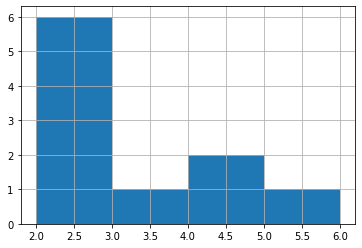

  group_id  group_size
0        A           2
1        B           4
2        C           6
3        D           2
4        E           2
5        F           2
6        G           3
7        H           2
8        I           4
9        J           2


In [23]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=np.linspace(2,6,5))
plt.show()

print(restaurant_groups)

- Count the number of each group_size in restaurant_groups, then divide by the number of rows in 
restaurant_groups to calculate the probability of randomly selecting a group of each size. 
Save as size_dist.
Reset the index of size_dist.
Rename the columns of size_dist to group_size and prob.

In [26]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


- Calculate the expected value of the size_distribution, which represents the expected group size, by multiplying the group_size by the prob and taking the sum

In [27]:
# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

2.9000000000000004


- Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

In [30]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

0.30000000000000004


### Continuous distributions
##### We can use discrete distributions to model situations that involve discrete or countable variables,but how can we model continuous variables?

- Waiting for the bus
Let's start with an example. The city bus arrives once every twelve minutes, so if you show up at a 
random time, you could wait anywhere from 0 minutes if you just arrive as the bus pulls in, 
up to 12 minutes if you arrive just as the bus leaves.

- Continuous uniform distribution
Let's model this scenario with a probability distribution. There are an infinite number of minutes we
could wait since we could wait 1 minute, 1-point-5 minutes, 1-point-53 minutes, and so on, so we 
can't create individual blocks like we could with a discrete variable.
Instead, we'll use a continuous line to represent probability. The line is flat since there's the 
same probability of waiting any time from 0 to 12 minutes. This is called the continuous uniform 
distribution.

<img src = cud.png>

### Probability still = area

- Now that we have our distribution, let's figure out what the probability is that we'll wait between
  4 and 7 minutes. Just like with discrete distributions, we can take the area from 4 to 7 to 
    calculate probability.The width of this rectangle is 7 minus 4 which is 3. The height is one twelfth.

Multiplying those together to get area, we get 3/12 or 25%.

<img src = "probBus.png">


- In the same way, let's use the uniform distribution in Python to calculate the probability of waiting 7 minutes or less. We need to import uniform from scipy-dot-stats. We can call uniform-dot-cdf and pass it 7, followed by the lower and upper limits, which in our case is 0 and 12. The probability of waiting less than 7 minutes is about 58%.


- "Greater than" probabilities. If we want the probability of waiting more than 7 minutes, we need to take 1 minus the probability of waiting less than 7 minutes.

### Data back-ups
- The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.



- To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.


- Import uniform from scipy.stats and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called prob_less_than_5.

- Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called prob_greater_than_5.

In [34]:
# Import uniform from scipy.stats
from scipy.stats import uniform

# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

0.16666666666666666
0.8333333333333334


In [35]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.3333333333333333


### Simulating wait times
To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

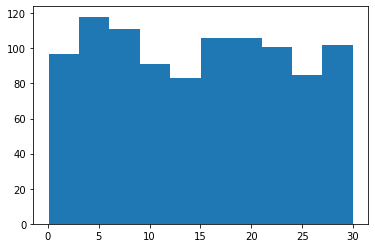

In [37]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

### The binomial distribution

- Coin flipping. We'll start by flipping a coin, which has two possible outcomes, heads or tails, each with a probability of 50%.


- Binary outcomes. This is just one example of a binary outcome, or an outcome with two possible values. We could also represent these outcomes as a 1 and a 0, a success or a failure, and a win or a loss.


- A single flip. In Python, we can simulate this by importing binom from scipy-dot-stats and using the binom-dot-rvs function, which takes in the number of coins we want to flip, the probability of heads or success, and an argument called size, which is number of trials. size is a named argument, so we'll need to explicitly specify that the third argument corresponds to size, orwe'll get incorrect results. This call will return a 1, which we'll count as a head, or a 0, which we'll count as tails. We can use binom-dot-rvs 1, 0-point-5, size equals 1 to flip 1 coin, with a 50% probability of heads, 1 time.


- One flip many times. To perform eight coin flips, we can change the size argument to 8, which will flip 1 coin with  a 50% chance of heads 8 times. This gives us a set of 8 ones and zeros.


- Many flips one time. If we swap the first and last arguments, we flip eight coins one time. This gives us one number, which is the total number of heads or successes.


- Many flips many times. Similarly, we can pass 3 as the first argument, and set size equal to 10 to flip 3 coins.This returns 10 numbers, each representing the total number of heads from each set of flips.


- Other probabilities. We could also have a coin that's heavier on one side than the other, so the probability of getting heads is only 25%. To simulate flips with this coin, we'll adjust the second argument of binom-dot-rvs to 0-point-25. The result has lower numbers, since getting multiple heads isn't as likely with the new coin.


- The binomial distribution describes the probability of the number of successes in a sequence of  independent trials. In other words, it can tell us the probability of getting some number of heads in a sequence of coin flips. Note that this is a discrete distribution since we're working with a countable outcome. The binomial distribution can be described using two parameters, n and p. n represents the total number of trials being performed, and p is the probability of success. n and p are also the third and second arguments of binom-dot-rvs. Here's what the distribution looks like for 10 coins. We have the biggest chance of getting 5 heads total, and a much smaller chance of getting 0 heads or 10 heads.


- What's the probability of 7 heads? To get the probability of getting 7 heads out of 10 coins, we canuse binom-dot-pmf. The first argument is the number of heads or successes. The second argument is the number of trials, n, and the third is the probability of success, p. If we flip 10 coins, there's  about a 12% chance that exactly 7 of them will be heads.


- What's the probability of 7 or fewer heads? binom-dot-cdf gives the probability of getting a number of successes less than or equal to the first argument. The probability of getting 7 or fewer heads out of 10 coins is about 95%.


- What's the probability of more than 7 heads? We can take 1 minus the probability of getting 7 or fewer heads to get the probability of a number of successes greater than the first argument.


- Expected value. The expected value of the binomial distribution can be calculated by multiplying n times p. The expected number of heads we'll get from flipping 10 coins is 10 times 0-point-5, which is 5.


- Independence: It's important to remember that in order for the binomial distribution to apply, each trial must be  independent, so the outcome of one trial shouldn't have an effect on the next. For example, if we're  picking randomly from these cards with zeros and ones, we have a 50-50 chance of getting a 0 or a 1. But since we're sampling without replacement, the probabilities for the second trial are different due to the outcome of the first trial. Since these trials aren't independent, we can't calculate accurate probabilities for this situation using the binomial distribution.

### Simulating sales deals
- Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [38]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

[1]


Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.
Print the mean number of deals he won per week.

In [39]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

0.8461538461538461


In [40]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

0.026999999999999996


In [41]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

0.784


In [42]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.21599999999999997


### How many sales will be won?
Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by n * p.

In [43]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998
